<a href="https://colab.research.google.com/github/Daivar/Deep_Learning_Models/blob/main/Time_series_missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from pandas import read_csv
# reading from the URL directly
url = 'https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/09_Sequential_Data_Analysis/melbourne_min_daily_temps.csv'
series = read_csv(url)
print(series.head())

         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8


In [17]:
import xlrd
xlrd.__VERSION__

'1.1.0'

In [35]:
import pandas as pd
from datetime import datetime
import numpy as np

date_rng = pd.date_range(start='1/1/2018', end='1/08/2018', freq='H')
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0, 100, size=(len(date_rng)))
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)
print(df.head(10))

print(df.resample('D').mean().head(10))
df.resample('D').max()
df.resample('D').min()
# df.resample('D').std()

                     data
datetime                 
2018-01-01 00:00:00     2
2018-01-01 01:00:00    73
2018-01-01 02:00:00     1
2018-01-01 03:00:00    51
2018-01-01 04:00:00    90
2018-01-01 05:00:00    30
2018-01-01 06:00:00    30
2018-01-01 07:00:00    68
2018-01-01 08:00:00    85
2018-01-01 09:00:00    31
                 data
datetime             
2018-01-01  43.708333
2018-01-02  47.291667
2018-01-03  50.541667
2018-01-04  55.333333
2018-01-05  44.750000
2018-01-06  54.916667
2018-01-07  49.000000
2018-01-08  81.000000


,data
datetime,
2018-01-01,1
2018-01-02,9
2018-01-03,4
2018-01-04,2
2018-01-05,5
2018-01-06,0
2018-01-07,2
2018-01-08,81


In [37]:
df['rolling_sum'] = df.rolling(3).sum()
df.head(10)

,data,rolling_sum
datetime,,
2018-01-01 00:00:00,2,NaN
2018-01-01 01:00:00,73,NaN
2018-01-01 02:00:00,1,76.0
2018-01-01 03:00:00,51,125.0
2018-01-01 04:00:00,90,142.0
2018-01-01 05:00:00,30,171.0
2018-01-01 06:00:00,30,150.0
2018-01-01 07:00:00,68,128.0
2018-01-01 08:00:00,85,183.0


In [39]:
df['roll_avg'] = df['data'].rolling(5).mean()
df['roll_std'] = df['data'].rolling(5).std()
df['roll_min'] = df['data'].rolling(5).min()
df['roll_max'] = df['data'].rolling(5).max()
df.head(10)

,data,rolling_sum,roll_avg,roll_std,roll_min,roll_max
datetime,,,,,,
2018-01-01 00:00:00,2,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,73,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,1,76.0,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,51,125.0,NaN,NaN,NaN,NaN
2018-01-01 04:00:00,90,142.0,43.4,40.673087,1.0,90.0
2018-01-01 05:00:00,30,171.0,49.0,35.092734,1.0,90.0
2018-01-01 06:00:00,30,150.0,40.4,32.943892,1.0,90.0
2018-01-01 07:00:00,68,128.0,53.8,25.752670,30.0,90.0
2018-01-01 08:00:00,85,183.0,60.6,29.099828,30.0,90.0


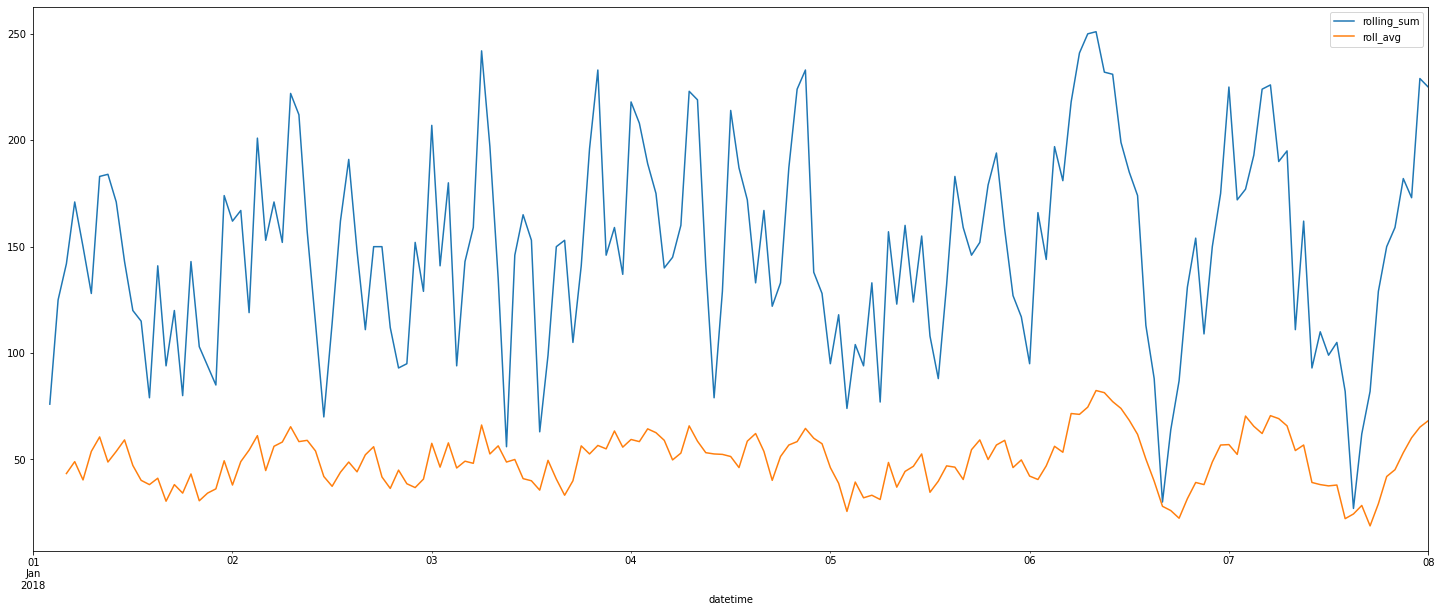

In [40]:
df.drop(['roll_std', 'roll_min', 'roll_max', 'data'], axis=1, inplace=True)
df.plot(figsize=(25, 10))

In [42]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')
df.head(10)

,rolling_sum,roll_avg,rolling_sum_backfilled
datetime,,,
2018-01-01 00:00:00,NaN,NaN,76.0
2018-01-01 01:00:00,NaN,NaN,76.0
2018-01-01 02:00:00,76.0,NaN,76.0
2018-01-01 03:00:00,125.0,NaN,125.0
2018-01-01 04:00:00,142.0,43.4,142.0
2018-01-01 05:00:00,171.0,49.0,171.0
2018-01-01 06:00:00,150.0,40.4,150.0
2018-01-01 07:00:00,128.0,53.8,128.0
2018-01-01 08:00:00,183.0,60.6,183.0


In [43]:
x=np.arange(0,3 * np.pi, 0.1)
y=np.sin(x) ** 2

dr = pd.date_range(start='1/1/2018', periods=len(y), freq='H')

data = {'TS': dr, 'C': y}
df = pd.DataFrame(data) 
df = df.set_index('TS')

df.head(10)

,C
TS,
2018-01-01 00:00:00,0.000000
2018-01-01 01:00:00,0.009967
2018-01-01 02:00:00,0.039470
2018-01-01 03:00:00,0.087332
2018-01-01 04:00:00,0.151647
2018-01-01 05:00:00,0.229849
2018-01-01 06:00:00,0.318821
2018-01-01 07:00:00,0.415016
2018-01-01 08:00:00,0.514600


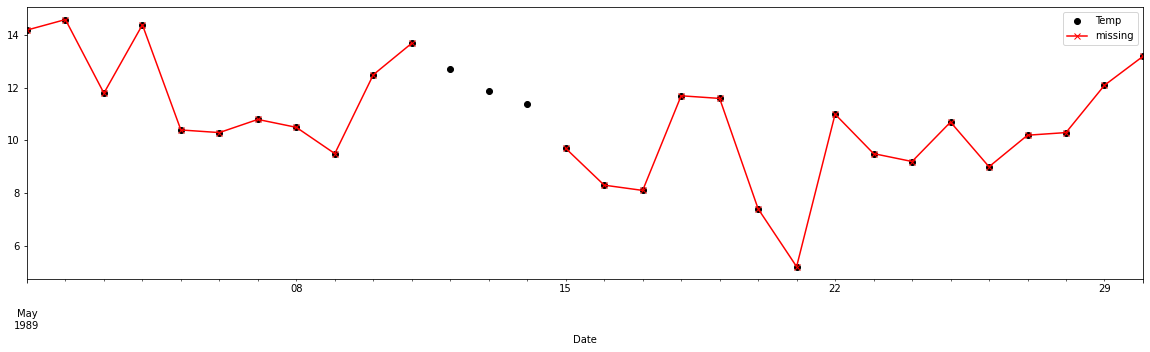

In [54]:
import pandas as pd
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt

url = 'https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/09_Sequential_Data_Analysis/melbourne_min_daily_temps.csv'

# read the data
series = read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True)
df = pd.DataFrame(series) 

# create a copy
df_copy = df['1989-05-01':'1989-05-30'].copy()

# copy the collumn we are interested in
df_copy['missing'] = df_copy['Temp']

# delete some data from the copied collumn
df_copy.iloc[11, 1] = np.nan
df_copy.iloc[12, 1] = np.nan
df_copy.iloc[13, 1] = np.nan

# display the missing data
df_copy.plot(style=['ko', 'rx-'], figsize=(20,5))

In [55]:
# run the imputation and interpolation methods creating a new collumn for each
df_copy = df_copy.assign(GlobalMean=df_copy.missing.fillna(df_copy.missing.mean()))
df_copy = df_copy.assign(GlobalMedian=df_copy.missing.fillna(df_copy.missing.median()))
df_copy = df_copy.assign(RollingMean4=df_copy.missing.fillna(df_copy.missing.rolling(4, min_periods=1,).mean()))
df_copy = df_copy.assign(RollingMedian4=df_copy.missing.fillna(df_copy.missing.rolling(4, min_periods=1,).median()))
df_copy = df_copy.assign(RollingMean8=df_copy.missing.fillna(df_copy.missing.rolling(8, min_periods=1,).mean()))
df_copy = df_copy.assign(RollingMedian8=df_copy.missing.fillna(df_copy.missing.rolling(8, min_periods=1,).median()))
df_copy = df_copy.assign(InterpolateLinear=df_copy.missing.interpolate(method='linear'))
df_copy = df_copy.assign(InterpolateTime=df_copy.missing.interpolate(method='time'))
df_copy = df_copy.assign(InterpolateQuadratic=df_copy.missing.interpolate(method='quadratic'))
df_copy = df_copy.assign(InterpolateCubic=df_copy.missing.interpolate(method='cubic'))
df_copy = df_copy.assign(InterpolateSLinear=df_copy.missing.interpolate(method='slinear'))
df_copy = df_copy.assign(InterpolateAkima=df_copy.missing.interpolate(method='akima'))
df_copy = df_copy.assign(InterpolatePoly5=df_copy.missing.interpolate(method='polynomial', order=5)) 
df_copy = df_copy.assign(InterpolatePoly7=df_copy.missing.interpolate(method='polynomial', order=7))
df_copy = df_copy.assign(InterpolateSpline3=df_copy.missing.interpolate(method='spline', order=3))
df_copy = df_copy.assign(InterpolateSpline4=df_copy.missing.interpolate(method='spline', order=4))
df_copy = df_copy.assign(InterpolateSpline5=df_copy.missing.interpolate(method='spline', order=5))

# calculate r2 score and sort
from sklearn.metrics import r2_score
# list(df_copy)[3:]

results = [(method, r2_score(df_copy.Temp, df_copy[method])) for method in list(df_copy)[3:]]
results_df = pd.DataFrame(np.array(results), columns=['Method', 'R_squared'])
results_df.sort_values(by='R_squared', ascending=False)

,Method,R_squared
14,InterpolateSpline4,0.9981237202274131
10,InterpolateAkima,0.9975876139892538
5,InterpolateLinear,0.996021907032718
6,InterpolateTime,0.996021907032718
9,InterpolateSLinear,0.996021907032718
13,InterpolateSpline3,0.9948251294817735
8,InterpolateCubic,0.9929326165939217
7,InterpolateQuadratic,0.9884925145943271
11,InterpolatePoly5,0.9825622526965962
15,InterpolateSpline5,0.9798141272794265


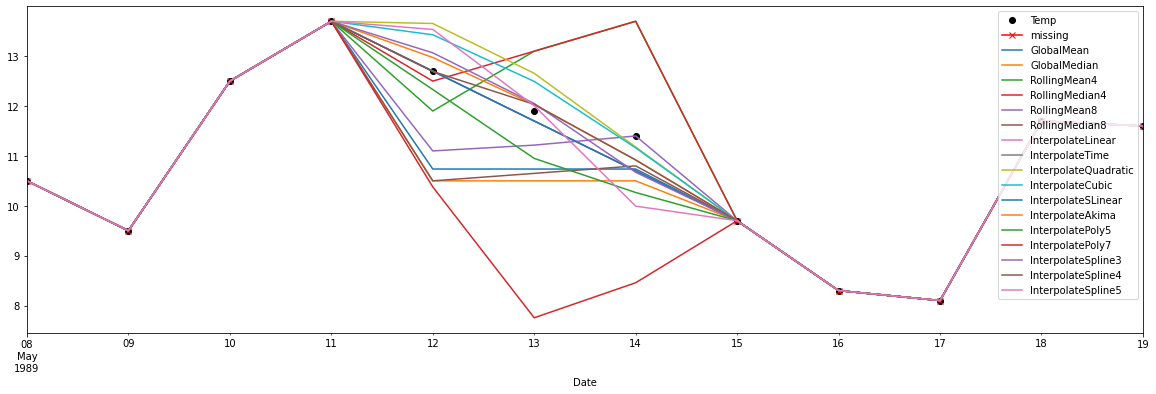

In [56]:
# display how it looks when interpolated
df_copy['1989-05-08':'1989-05-19'].plot(style=['ko', 'rx-'], figsize=(20,6))

,Method,R_squared
1,RollingMean8,0.8463302683823066
0,GlobalMedian,0.8236879173557441
2,RollingMedian8,0.8230311567243532
6,InterpolateCubic,0.7868170762471947
5,InterpolateQuadratic,0.7156509047803095
3,InterpolateLinear,0.6278043678960394
4,InterpolateTime,0.6278043678960394
7,InterpolateSLinear,0.6278043678960394
8,InterpolateAkima,0.6272713998306534
12,InterpolateSpline4,0.3835366285976579


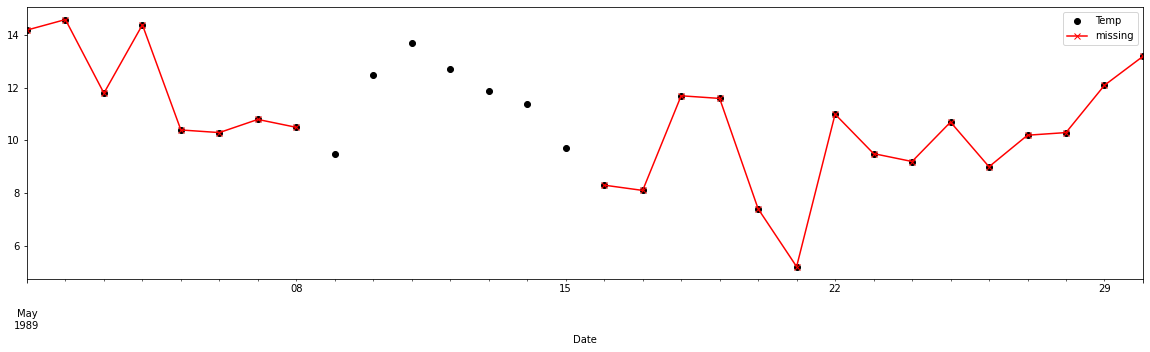

In [57]:
import pandas as pd
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

url = 'https://raw.githubusercontent.com/MindaugasBernatavicius/DeepLearningCourse/master/09_Sequential_Data_Analysis/melbourne_min_daily_temps.csv'
series = read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True)
df = pd.DataFrame(series)

df_copy = df['1989-05-01':'1989-05-30'].copy()

df_copy['missing'] = df_copy['Temp']

df_copy.iloc[8, 1] = np.nan
df_copy.iloc[9, 1] = np.nan
df_copy.iloc[10, 1] = np.nan
df_copy.iloc[11, 1] = np.nan
df_copy.iloc[12, 1] = np.nan
df_copy.iloc[13, 1] = np.nan
df_copy.iloc[14, 1] = np.nan

df_copy.plot(style=['ko', 'rx-'], figsize=(20,5))

df_copy = df_copy.assign(GlobalMean=df_copy.missing.fillna(df_copy.missing.mean()))
df_copy = df_copy.assign(GlobalMedian=df_copy.missing.fillna(df_copy.missing.median()))
df_copy = df_copy.assign(RollingMean8=df_copy.missing.fillna(df_copy.missing.rolling(8, min_periods=1,).mean()))
df_copy = df_copy.assign(RollingMedian8=df_copy.missing.fillna(df_copy.missing.rolling(8, min_periods=1,).median()))
df_copy = df_copy.assign(InterpolateLinear=df_copy.missing.interpolate(method='linear'))
df_copy = df_copy.assign(InterpolateTime=df_copy.missing.interpolate(method='time'))
df_copy = df_copy.assign(InterpolateQuadratic=df_copy.missing.interpolate(method='quadratic'))
df_copy = df_copy.assign(InterpolateCubic=df_copy.missing.interpolate(method='cubic'))
df_copy = df_copy.assign(InterpolateSLinear=df_copy.missing.interpolate(method='slinear'))
df_copy = df_copy.assign(InterpolateAkima=df_copy.missing.interpolate(method='akima'))
df_copy = df_copy.assign(InterpolatePoly5=df_copy.missing.interpolate(method='polynomial', order=5)) 
df_copy = df_copy.assign(InterpolatePoly7=df_copy.missing.interpolate(method='polynomial', order=7))
df_copy = df_copy.assign(InterpolateSpline3=df_copy.missing.interpolate(method='spline', order=3))
df_copy = df_copy.assign(InterpolateSpline4=df_copy.missing.interpolate(method='spline', order=4))
df_copy = df_copy.assign(InterpolateSpline5=df_copy.missing.interpolate(method='spline', order=5))

results = [(method, r2_score(df_copy.Temp, df_copy[method])) for method in list(df_copy)[3:]]
results_df = pd.DataFrame(np.array(results), columns=['Method', 'R_squared'])
results_df.sort_values(by='R_squared', ascending=False)

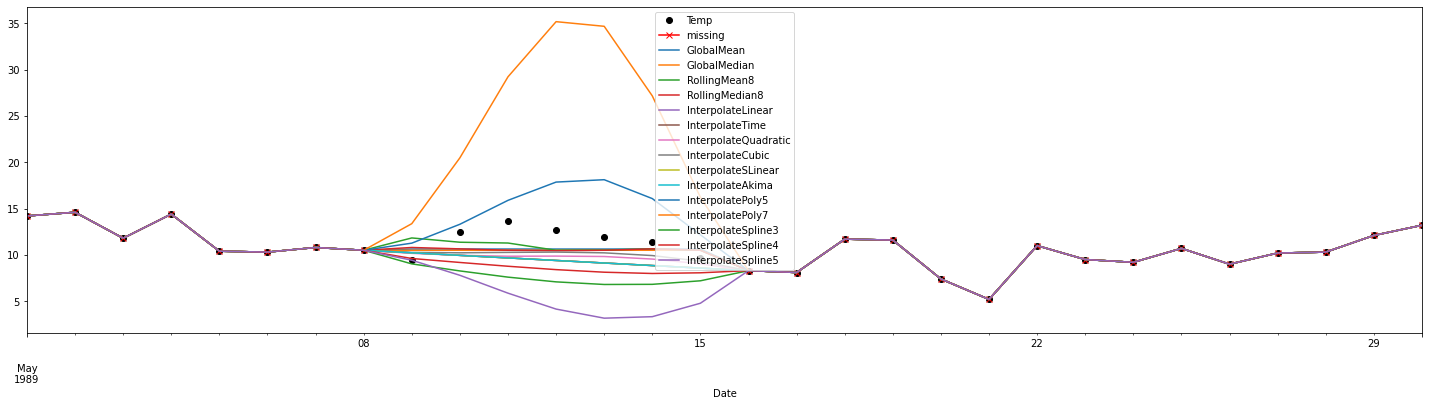

In [58]:
df_copy['1989-05-01':'1989-05-30'].plot(style=['ko', 'rx-'], figsize=(25,6))
# plt.tight_layout()